# CS224n

# Assignment 2

---

## 1. Tensorflow Softmax

### (a)

In [1]:
import numpy as np
import tensorflow as tf
from utils.general_utils import test_all_close

In [41]:
print(tf.__version__)

1.13.1


In [2]:
tf.enable_eager_execution()

In [46]:
x = tf.constant([[1,2,3],[4,5,6]], dtype=tf.float64)

In [47]:
print(x)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float64)


In [48]:
x_max = tf.reduce_max(x, axis=0)
x2 = x - x_max

In [49]:
print(x_max)

tf.Tensor([4. 5. 6.], shape=(3,), dtype=float64)


In [50]:
print(x2)
print("shape: ", x2.shape)

tf.Tensor(
[[-3. -3. -3.]
 [ 0.  0.  0.]], shape=(2, 3), dtype=float64)
shape:  (2, 3)


In [51]:
exp_x2 = tf.exp(x2)

In [52]:
print(exp_x2)
print("shape: ", exp_x2.shape)

tf.Tensor(
[[0.04978707 0.04978707 0.04978707]
 [1.         1.         1.        ]], shape=(2, 3), dtype=float64)
shape:  (2, 3)


In [56]:
denum = tf.reduce_sum(exp_x2, axis= 0, keep_dims=True)
print(denum)

tf.Tensor([[1.04978707 1.04978707 1.04978707]], shape=(1, 3), dtype=float64)


In [57]:
exp_x2 / denum

<tf.Tensor: id=70, shape=(2, 3), dtype=float64, numpy=
array([[0.04742587, 0.04742587, 0.04742587],
       [0.95257413, 0.95257413, 0.95257413]])>

In [59]:
import math

In [63]:
print(math.exp(0) / (math.exp(0) + math.exp(1)))

0.2689414213699951


In [90]:
def softmax(x):
    """
    Compute the softmax function in tensorflow.

    You might find the tensorflow functions tf.exp, tf.reduce_max,
    tf.reduce_sum, tf.expand_dims useful. (Many solutions are possible, so you may
    not need to use all of these functions). Recall also that many common
    tensorflow operations are sugared (e.g. x + y does elementwise addition
    if x and y are both tensors). Make sure to implement the numerical stability
    fixes as in the previous homework!

    Args:
        x:   tf.Tensor with shape (n_samples, n_features). Note feature vectors are
                  represented by row-vectors. (For simplicity, no need to handle 1-d
                  input as in the previous homework)
    Returns:
        out: tf.Tensor with shape (n_sample, n_features). You need to construct this
                  tensor in this problem.
    """

    ### YOUR CODE HERE

    # Let's shift x by x_max
    # shape(1, n_features)
    x_max = tf.reduce_max(x, axis=1, keepdims=True)
    print("x_max", x_max)
    # shape(1, n_features)
    x2 = x - x_max
    exp_x2 = tf.exp(x2)

    denum = tf.reduce_sum(exp_x2, axis=1, keepdims=True)

    out = exp_x2 / denum

    ### END YOUR CODE

    return out

In [91]:
test1 = tf.constant(np.array([[1001, 1002], [3, 4]]), dtype=tf.float32)
print(test1)

tf.Tensor(
[[1001. 1002.]
 [   3.    4.]], shape=(2, 2), dtype=float32)


In [92]:

print(softmax(test1))

x_max tf.Tensor(
[[1002.]
 [   4.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.26894143 0.7310586 ]
 [0.26894143 0.7310586 ]], shape=(2, 2), dtype=float32)


---

Our $X$ matrix (n_data, n_dims) is to get a classification score for every data:  
To which class does data $i$ belong to?

Thus, applying softmax to our $X$ matrix is in fact applying softmax to each of our data lines, and finding the most probable features  
(ie, we will then get something like this:

  [0, 0, 0, 1, 0, 0, ..., 0]
  
Hence, we apply the max function, as well as the sum function horizontally (dim=1)

### (b)

In [132]:
def cross_entropy_loss(y, yhat):
    """
    Compute the cross entropy loss in tensorflow.
    The loss should be summed over the current minibatch.

    y is a one-hot tensor of shape (n_samples, n_classes) and yhat is a tensor
    of shape (n_samples, n_classes). y should be of dtype tf.int32, and yhat should
    be of dtype tf.float32.

    The functions tf.to_float, tf.reduce_sum, and tf.log might prove useful. (Many
    solutions are possible, so you may not need to use all of these functions).

    Note: You are NOT allowed to use the tensorflow built-in cross-entropy
                functions.

    Args:
        y:    tf.Tensor with shape (n_samples, n_classes). One-hot encoded.
        yhat: tf.Tensorwith shape (n_sample, n_classes). Each row encodes a
                    probability distribution and should sum to 1.
    Returns:
        out:  tf.Tensor with shape (1,) (Scalar output). You need to construct this
                    tensor in the problem.
    """

    ### YOUR CODE HERE

    log_yhat = tf.log(yhat)
    y = tf.to_float(y)
    cross_prod = y * log_yhat

    print(cross_prod)
    
    out = - tf.reduce_sum(cross_prod, keepdims=False)

    ### END YOUR CODE

    return out

In [133]:
y = tf.constant([[1,0,0],
                 [0,1,0]], dtype=tf.int32)

In [134]:
yhat = tf.constant([[0.9,0.05,0.05],
                   [0.97,0.01,0.02]], dtype=tf.float32)

In [135]:
tf.to_float(y)

<tf.Tensor: id=291, shape=(2, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.]], dtype=float32)>

In [136]:
cross_entropy_loss(y, yhat)

tf.Tensor(
[[-0.10536055 -0.         -0.        ]
 [-0.         -4.6051702  -0.        ]], shape=(2, 3), dtype=float32)


<tf.Tensor: id=299, shape=(), dtype=float32, numpy=4.7105308>

### (c)

The placeholder variables

The feed dictionaries consist of a dictionary of placeholders, which are mapped to the tensors that should be used


### (d)

In [138]:
a = tf.constant(np.array([[1001, 1002], [3, 4], [10,11]]), dtype=tf.float32)
b = tf.constant(np.array([[1001, 1002, 3], [4, 10,11]]), dtype=tf.float32)

In [140]:
tf.linalg.matmul(a,b)

<tf.Tensor: id=304, shape=(3, 3), dtype=float32, numpy=
array([[1.006009e+06, 1.013022e+06, 1.402500e+04],
       [3.019000e+03, 3.046000e+03, 5.300000e+01],
       [1.005400e+04, 1.013000e+04, 1.510000e+02]], dtype=float32)>

### (e)

When the model's *train_op* is called, what happens?

* During forward prop:
    * We compute $x * W + b$ (with $W$, $b$ initialized to zeros)
    * We apply softmax to get predictions
    * We compute the cross-entropy categorical loss
    
    
* During backprop:
    * We do gradient descent, using the *tf Optimizer*

What will have changed?

The weights of the parameters $W$ and $b$ will have been updated to minimize our cross-entropy loss function£

## 2. Neural Transition-Based Dependency Parsing

### (a)

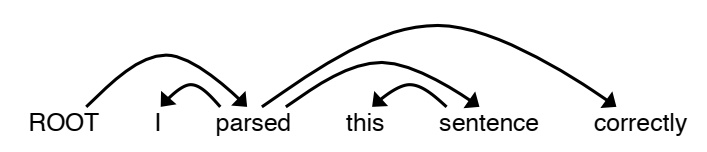